In [1]:
from datetime import *
from gmplot import gmplot
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#read dataset and take a look
stations = pd.read_csv("austin-bike/austin_bikeshare_stations.csv")
trips = pd.read_csv("austin-bike/austin_bikeshare_trips.csv")

trips[:5]

,bikeid,checkout_time,duration_minutes,end_station_id,end_station_name,month,start_station_id,start_station_name,start_time,subscriber_type,trip_id,year
0,8.0,19:12:00,41,2565.0,Trinity & 6th Street,3.0,2536.0,Waller & 6th St.,2015-03-19 19:12:00,Walk Up,9900082882,2015.0
1,141.0,2:06:04,6,2570.0,South Congress & Academy,10.0,2494.0,2nd & Congress,2016-10-30 02:06:04,Local365,12617682,2016.0
2,578.0,16:28:27,13,2498.0,Convention Center / 4th St. @ MetroRail,3.0,2538.0,Bullock Museum @ Congress & MLK,2016-03-11 16:28:27,Local365,9075366,2016.0
3,555.0,15:12:00,80,2712.0,Toomey Rd @ South Lamar,11.0,2497.0,Capitol Station / Congress & 11th,2014-11-23 15:12:00,24-Hour Kiosk (Austin B-cycle),9900319298,2014.0
4,86.0,15:39:13,25,3377.0,MoPac Pedestrian Bridge @ Veterans Drive,4.0,2707.0,Rainey St @ Cummings,2017-04-16 15:39:13,Walk Up,14468597,2017.0


In [3]:
#transfer time into datetime
trips["start_time"] = trips["start_time"].map(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

trips["hours"] = trips["start_time"].map(lambda x : x.hour)

In [4]:
#check earliest and  of this dataset
print max(trips["start_time"] ), min(trips["start_time"] )

2017-07-31 23:44:27 2013-12-21 09:12:00


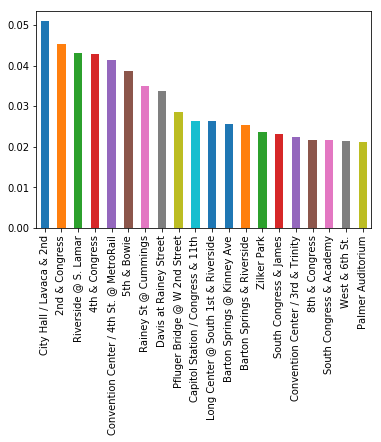

In [5]:
(trips["end_station_name"].value_counts()[:20]/sum(trips["end_station_name"].value_counts())).plot(kind = "bar")

In [6]:
#summary statistics
trips[["duration_minutes", "hours", "month","year"]].describe()

,duration_minutes,hours,month,year
count,649231.000000,649231.000000,618479.000000,618479.000000
mean,29.127506,14.314417,5.887185,2015.340026
std,87.278642,4.481804,3.206358,1.019771
min,0.000000,0.000000,1.000000,2013.000000
25%,8.000000,12.000000,3.000000,2014.000000
50%,15.000000,15.000000,5.000000,2015.000000
75%,28.000000,17.000000,9.000000,2016.000000
max,21296.000000,23.000000,12.000000,2017.000000


In [18]:
#check the number of rides in each membership type
membership_summary = trips.groupby(["subscriber_type"])["subscriber_type"].count().sort_values(ascending=False)
membership_summary
print(sum(membership_summary[:14])/float(sum(membership_summary)))


0.9870834453623094


In [8]:
#check number of rides on each type of membership by year
frequent_m = membership_summary[:14]
frequent_m_mask = trips["subscriber_type"].map(lambda x : x in frequent_m)
freq_m_year = trips[frequent_m_mask].groupby(["subscriber_type", "year"])["subscriber_type"].count()
freq_m_year
#some type of memberships have become inactive

subscriber_type                       year  
24-Hour Kiosk (Austin B-cycle)        2013.0      1296
                                      2014.0    107376
7-Day                                 2014.0       127
                                      2015.0      3005
                                      2016.0         5
7-Day Membership (Austin B-cycle)     2013.0        13
                                      2014.0      2747
Annual Membership (Austin B-cycle)    2013.0        72
                                      2014.0     30234
Explorer                              2014.0        80
                                      2015.0      2456
                                      2016.0      2712
                                      2017.0      2090
Founding Member                       2014.0       366
                                      2015.0      1860
                                      2016.0      1235
                                      2017.0        89
Founding Member (Aus

In [9]:
# Selected 5 most important and active group of members and check the number of rides by months
active_groups_s = ["Walk Up", "Weekender", "Local365", "Local30", "Explorer"]
end = datetime.datetime.strptime("2017", "%Y")
start = datetime.datetime.strptime("2014", "%Y")
trips_t_control = trips[(trips["start_time"] > start) & (trips["start_time"] < end)]
active_groups_mask = trips_t_control["subscriber_type"].map(lambda x : x in active_groups_s)

frequent_m_month = trips_t_control[active_groups_mask].groupby(["subscriber_type", "month"])["subscriber_type"].count()

frequent_m_month
#most bike trips are taken between March to October

subscriber_type  month
Explorer         1.0        435
                 2.0        182
                 3.0        882
                 4.0        251
                 5.0        415
                 6.0        522
                 7.0        558
                 8.0        309
                 9.0        351
                 10.0       733
                 11.0       419
                 12.0       191
Local30          1.0       1764
                 2.0        232
                 3.0       3288
                 4.0        932
                 5.0       2017
                 6.0       2374
                 7.0       3466
                 8.0       2907
                 9.0       2399
                 10.0      2912
                 11.0      2056
                 12.0       881
Local365         1.0       9685
                 2.0       2364
                 3.0      11599
                 4.0       3715
                 5.0       7787
                 6.0       8019
                 

In [23]:
frequent_m_hour = trips_t_control[active_groups_mask].groupby(["subscriber_type", "hours"])["subscriber_type"].count()

#frequent_m_hour["Local365"]
#frequent_m_hour["Local30"]
# There are more bike rented by locals among peak hours
#frequent_m_hour["Weekender"]
frequent_m_hour["Walk Up"]
# Bike rented by tourist are more evenly distributed in daytime

hours
0      2456
1      1773
2      1961
3       489
4       185
5       138
6       316
7      1088
8      2700
9      5748
10    10709
11    15757
12    19757
13    22521
14    23399
15    23646
16    20776
17    17963
18    15021
19    11829
20     8903
21     7038
22     5506
23     3481
Name: subscriber_type, dtype: int64

In [24]:
def hours_to_category(hours):
    if hours >= 7 and hours <= 9:
        return "rush_m"
    elif hours >= 10 and hours <= 4:
        return "day time"
    elif hours >=5 and hours <= 7:
        return "rush_n"
    else:
        return "others"

In [25]:
trips_t_control["time_cat"] = trips_t_control["hours"].map(hours_to_category)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
stations_close_McCombs = stations[(stations["latitude"] < 30.30) & (stations["latitude"] > 30.27) \
                                  & (stations["longitude"] < -97.6) & (stations["longitude"] > -97.8)\
                                 & (stations["status"] == "active")]
stations_close_McCombs
#stations_close_McCombs.loc[:,["station_id", "latitude", "longitude"]]

,latitude,location,longitude,name,station_id,status
0,30.27041,(30.27041 -97.75046),-97.75046,West & 6th St.,2537,active
9,30.28576,(30.28576 -97.74181),-97.74181,UT West Mall @ Guadalupe,2548,active
10,30.27336,(30.27336 -97.73805),-97.73805,State Capitol Visitors Garage @ San Jacinto & ...,2561,active
17,30.27466,(30.27466 -97.77028),-97.77028,MoPac Pedestrian Bridge @ Veterans Drive,3377,active
21,30.27217,(30.27217 -97.75246),-97.75246,Henderson & 9th,3685,active
31,30.27193,(30.27193 -97.73854),-97.73854,11th & San Jacinto,3291,active
38,30.27186,(30.27186 -97.73997),-97.73997,OFFICE/Main/Shop/Repair,1001,active
53,30.27260,(30.2726 -97.74127),-97.74127,Capitol Station / Congress & 11th,2497,active
56,30.28118,(30.28118 -97.75219),-97.75219,Pease Park,3464,active
57,30.28039,(30.28039 -97.73809),-97.73809,Bullock Museum @ Congress & MLK,2538,active


In [14]:
borrow_heatmap_df = trips_t_control[["start_station_id","time_cat"]].merge(stations_close_McCombs[["station_id", "latitude", "longitude","location"]],
                                                                           left_on = "start_station_id",
                                                                          right_on = "station_id")
borrow_heatmap_df[:5]

,start_station_id,time_cat,station_id,latitude,longitude,location
0,2538.0,others,2538,30.28039,-97.73809,(30.28039 -97.73809)
1,2538.0,others,2538,30.28039,-97.73809,(30.28039 -97.73809)
2,2538.0,others,2538,30.28039,-97.73809,(30.28039 -97.73809)
3,2538.0,others,2538,30.28039,-97.73809,(30.28039 -97.73809)
4,2538.0,others,2538,30.28039,-97.73809,(30.28039 -97.73809)


In [15]:
rush_m_heatmap_df = borrow_heatmap_df[borrow_heatmap_df["time_cat"] == "rush_m"]
rush_m_heatmap_weight = borrow_heatmap_df.groupby(["latitude", "longitude"])["location"].count()
rush_m_station_lat , rush_m_station_lon = zip(*rush_m_heatmap_weight.index.values)
rush_m_heatmap_weight.values
#rush_m_heatmap_weight_p = rush_m_heatmap_weight.values/ float(sum(rush_m_heatmap_weight.values))

array([10186,  2087, 16805,  3944,  5110,  4135,  6352,  9145,   334,
        9115])

In [16]:
rush_m_heatmap_weight_p 

NameError: name 'rush_m_heatmap_weight_p' is not defined

In [ ]:
gmap = gmplot.GoogleMapPlotter(30.28398,-97.73792, 13)


#gmap.heatmap(rush_m_heatmap_df["latitude"] ,rush_m_heatmap_df["longitude"], threshold=10, radius = 35)
gmap.heatmap_weighted(rush_m_station_lat, rush_m_station_lon,rush_m_heatmap_weight.values , threshold=15000, radius = 35)
# Draw
#gmap.draw("rush_morning.html")
gmap.draw("rush_morning_w.html")

In [95]:
rush_m_heatmap_df

,start_station_id,time_cat,station_id,latitude,longitude
47,2538.0,rush_m,2538,30.28039,-97.73809
89,2538.0,rush_m,2538,30.28039,-97.73809
137,2538.0,rush_m,2538,30.28039,-97.73809
146,2538.0,rush_m,2538,30.28039,-97.73809
165,2538.0,rush_m,2538,30.28039,-97.73809
193,2538.0,rush_m,2538,30.28039,-97.73809
205,2538.0,rush_m,2538,30.28039,-97.73809
279,2538.0,rush_m,2538,30.28039,-97.73809
303,2538.0,rush_m,2538,30.28039,-97.73809
305,2538.0,rush_m,2538,30.28039,-97.73809


In [22]:
datetime.datetime.strptime(trips["start_time"][0], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2015, 3, 19, 19, 12)

In [85]:
datetime.datetime.strptime("2017", "%Y")

datetime.datetime(2017, 1, 1, 0, 0)